In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))  # parent of examples -> project root

In [2]:
import PhysicsTool as pt
pt.plotting.set_theme()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sympy
np.random.seed(0)

# Working with Err Objects

In this section, we will demonstrate how to create uncorrelated error `UErr` objects that represent quantities with both a mean and an associated error. The `UErr` class simplifies calculations involving uncertainties by handling both the mean and the error simultaneously, but where the correlation between values is **not** considered.

## Creating some example data

Here I generate the raw data used in this example.
We are interested in the following 3 Quantities:
 - $x$: Of which we know the mean and error
 - $y$: Of which we are given 10 measurements
 - $z$: Of which we are given 5 series of 10 measurements 

In [3]:
x_center = 1.4546354
y_center = 0.0013409
z_center = 1531.5091

x_mean = x_center
x_error = 0.64813414

NR_MEASUREMENTS = 20
NR_SERIES = 5

y_data = np.random.standard_normal(NR_MEASUREMENTS) * 0.5 + y_center
z_data = np.random.standard_normal((NR_SERIES, NR_MEASUREMENTS)) * np.linspace(0.1, 5, NR_SERIES)[:, None] + z_center

raw_data_table = pd.DataFrame({
    'y' : y_data,
} | {
    f'z_{i}' : col for i, col in enumerate(z_data)
})

print(f'x mean: {x_mean}\nx error: {x_error}')
display(raw_data_table)

x mean: 1.4546354
x error: 0.64813414


,y,z_0,z_1,z_2,z_3,z_4
0,0.883367,1531.253801,1530.119767,1529.794326,1527.110659,1540.924853
1,0.201420,1531.574462,1529.627576,1530.592239,1534.909720,1524.770305
2,0.490710,1531.595544,1529.248292,1529.435577,1533.266976,1525.156675
3,1.121787,1531.434883,1534.093877,1527.107079,1525.709780,1536.356084
4,0.935120,1531.736075,1530.833811,1531.961537,1537.127252,1525.643483
5,-0.487298,1531.363663,1530.928652,1530.484559,1538.666082,1541.227206
6,0.476385,1531.513676,1529.849146,1527.352094,1535.958993,1529.441005
7,-0.074338,1531.490382,1532.539275,1532.689195,1530.829884,1527.771826
8,-0.050269,1531.662378,1529.370685,1529.195489,1527.467009,1541.123810
9,0.206640,1531.656036,1531.227219,1531.641561,1535.489655,1538.911674


## Instanciating error objects

The error objects for $x$ and $y$ can be generated directly using mean and standar error or using the `err.from_data()` method 

In [4]:
x_val = pt.UErr(x_mean, x_error)
y_val = pt.err.from_data(y_data)

### Creating error objects along an axis from data
We could generate a single error object for the measurements of $z$. But we might want to calculate mean and error for each series separately. That's why the  `err.from_data` method includes the `axis` argument to specify along what axis the mean and error should be computed

In [5]:
z_vals_grouped = pt.err.from_data(z_data, axis = 1)

## Advanced displaying of error objects
There are many ways to display the data stored in an `UErr` object. Below multiple different ways to do this are shown.

### simple print statement

In [6]:
print(z_vals_grouped)

(1.53151 ± 0.00003) × 10^3
(1.5310 ± 0.0003) × 10^3
(1.5306 ± 0.0004) × 10^3
(1.5331 ± 0.0008) × 10^3
(1.534 ± 0.001) × 10^3


### In a dataframe

In [7]:
display_example_table = pd.DataFrame()
display_example_table['z'] = z_vals_grouped
display_example_table.index.name = 'i'
display(display_example_table)

z_vals_from_series = pt.err.concatenate(display_example_table['z'])
display(z_vals_from_series)
print(z_vals_from_series)

,z
i,
0,((((1.53151 ± 0.00003) × 10^3)))
1,((((1.5310 ± 0.0003) × 10^3)))
2,((((1.5306 ± 0.0004) × 10^3)))
3,((((1.5331 ± 0.0008) × 10^3)))
4,((((1.534 ± 0.001) × 10^3)))


(1.53151 ± 0.00003) × 10^3
(1.5310 ± 0.0003) × 10^3
(1.5306 ± 0.0004) × 10^3
(1.5331 ± 0.0008) × 10^3
(1.534 ± 0.001) × 10^3

(1.53151 ± 0.00003) × 10^3
(1.5310 ± 0.0003) × 10^3
(1.5306 ± 0.0004) × 10^3
(1.5331 ± 0.0008) × 10^3
(1.534 ± 0.001) × 10^3


### with custom formatting

In [8]:
print('\ntoString() showcasing custom arguments\n')
print(z_vals_grouped.toString(pt.err.ENG_FORMAT_REL))
print('printing latex representation')
print(z_vals_grouped.latex(pt.err.SCI_FORMAT_REL))


toString() showcasing custom arguments

(1.531515 ± 0.0018%) × 10^3
(1.53099 ± 0.017%) × 10^3
(1.53061 ± 0.028%) × 10^3
(1.53310 ± 0.053%) × 10^3
(1.5340 ± 0.086%) × 10^3
printing latex representation
\SI{1.53151e3}{\SI{0.002}{\percent}}\\
\SI{1.5310e3}{\SI{0.02}{\percent}}\\
\SI{1.5306e3}{\SI{0.03}{\percent}}\\
\SI{1.5331e3}{\SI{0.05}{\percent}}\\
\SI{1.534e3}{\SI{0.09}{\percent}}


## Indexing, and enumerating
error objects can be indexed just like numpy arrays

In [9]:
display(z_vals_grouped[3])
display(z_vals_grouped[z_vals_grouped.err < 0.5])
for i, z_val in enumerate(z_vals_grouped[0:2]):
    print(f'{i}: {z_val}')

(1.5331 ± 0.0008) × 10^3

(1.53151 ± 0.00003) × 10^3
(1.5310 ± 0.0003) × 10^3
(1.5306 ± 0.0004) × 10^3

0: (1.53151 ± 0.00003) × 10^3
1: (1.5310 ± 0.0003) × 10^3


An iterable of error expressions can be concatenated with `pt.err.concatenate` similar to numpy arrays

In [10]:
err_list = [pt.UErr(1, 0.1), pt.UErr(2, 0.2), pt.UErr(3, 0.3)]
err = pt.err.concatenate(err_list)
display(err)

1.0 ± 0.1
2.0 ± 0.2
3.0 ± 0.3

## Averaging
We can compute the average over the different series. Note how the weighted average gives a more accurate result.

In [11]:
z_val_1 = z_vals_grouped.average()
z_val_2 = z_vals_grouped.weighted_average()

display(z_val_1)
display(z_val_2)

(1.5320 ± 0.0003) × 10^3

(1.53151 ± 0.00003) × 10^3

# Error propagation
It is also possible to automate a big part of the error calculation using `sympy` expression, or even working with the error objects directly

It is important to note, working with the errors directly **cannot** model correlations properly: 
i.e. if we have a value 
$$x = 1 \pm 0.5$$
then the result of
$x - x$ should be $x-x = 0 \pm 0$, however these types of operations will concider each variable to be **independent** from every other one, even if it is the same object, therefore the result would in this case be 
$$x-x = 0 \pm \sqrt{0.5}$$

In [12]:
x_err = pt.UErr(1, 0.5)
x_sym = sympy.symbols('x')
with sympy.evaluate(False):
    expr = x_sym - x_sym

display(x_err)
display(expr)

print('working with the value directly')
display(x_err-x_err)
print('working with the expression')
display(pt.err.u_propagate_error(expr, {x_sym : x_err}))


1.0 ± 0.5

-x + x

working with the value directly


0.0 ± 0.7

working with the expression


0.0000 ± 0

## Displaying the error derivation
Sometimes you might be interested in the expression of the error itself, not only the value, this can be accomplished using `sympy` and `pt.derive_err` 

In [13]:
from sys import stdout
a,x,y,w = sympy.symbols('a,x,y,w')

print('our initial equation')
some_equation = sympy.Eq(w + y - sympy.sin(x), a * sympy.exp(y * sympy.sin(x)) + 2)
display(some_equation)

print('our equation solved for w')
w_expr = sympy.solve(some_equation, w)[0]
display(w_expr)

print('error derivation of w assuming x,y,z are values with errors and a is a constant')

def log(eq : sympy.Eq):
    display(eq)
    print(sympy.latex(eq))

error_expr = pt.u_error_propagation_formula(w_expr, values = [x,y], target_symbol=w, logger = log)

print('the computed error expression:')
display(error_expr)

our initial equation


Eq(w + y - sin(x), a*exp(y*sin(x)) + 2)

our equation solved for w


a*exp(y*sin(x)) - y + sin(x) + 2

error derivation of w assuming x,y,z are values with errors and a is a constant


Eq(s_w**2, s_x**2*Derivative(w(y, x), x)**2 + s_y**2*Derivative(w(y, x), y)**2)

s_{w}^{2} = s_{x}^{2} \left(\frac{\partial}{\partial x} w{\left(y,x \right)}\right)^{2} + s_{y}^{2} \left(\frac{\partial}{\partial y} w{\left(y,x \right)}\right)^{2}


Eq(s_w**2, s_x**2*(a*y*exp(y*sin(x))*cos(x) + cos(x))**2 + s_y**2*(a*exp(y*sin(x))*sin(x) - 1)**2)

s_{w}^{2} = s_{x}^{2} \left(a y e^{y \sin{\left(x \right)}} \cos{\left(x \right)} + \cos{\left(x \right)}\right)^{2} + s_{y}^{2} \left(a e^{y \sin{\left(x \right)}} \sin{\left(x \right)} - 1\right)^{2}


Eq(s_w, sqrt(s_x**2*(a*y*exp(y*sin(x))*cos(x) + cos(x))**2 + s_y**2*(a*exp(y*sin(x))*sin(x) - 1)**2))

s_{w} = \sqrt{s_{x}^{2} \left(a y e^{y \sin{\left(x \right)}} \cos{\left(x \right)} + \cos{\left(x \right)}\right)^{2} + s_{y}^{2} \left(a e^{y \sin{\left(x \right)}} \sin{\left(x \right)} - 1\right)^{2}}
the computed error expression:


sqrt(s_x**2*(a*y*exp(y*sin(x))*cos(x) + cos(x))**2 + s_y**2*(a*exp(y*sin(x))*sin(x) - 1)**2)

## computing more complex things directly
Even complex formulae can be computed directly using `numpy` ufuncs, most numpy functions will work just fine on error objects simplifying the workflow

In [14]:
v_expr = x**sympy.sin(y**0.5)
v_val_expr= pt.u_propagate_error(v_expr, {x: x_val, y: y_val})

v_val_direct = x_val**np.sin(y_val**0.5)

display(v_val_expr)
display(v_val_direct)

assert v_val_expr.allclose(v_val_direct)

1.2 ± 0.3

1.2 ± 0.3

## This does not always work !!!

If the same symbols appears multiple times the values are correlated, then direct evaluation on using `sympy` will result in diffrent errors


In [15]:
w_expr = x**sympy.sin(y**0.5) - x**sympy.cos(y)
w_val_expr= pt.u_propagate_error(w_expr, {x: x_val, y: y_val})

w_val_direct = x_val**np.sin(y_val**0.5) - x_val**np.cos(y_val)

display(w_val_expr)
display(w_val_direct)

assert not w_val_expr.allclose(w_val_direct)

-0.2 ± 0.3

-0.2 ± 0.7

# Plotting
There are some helper functions which makes plotting, especially using errors easier

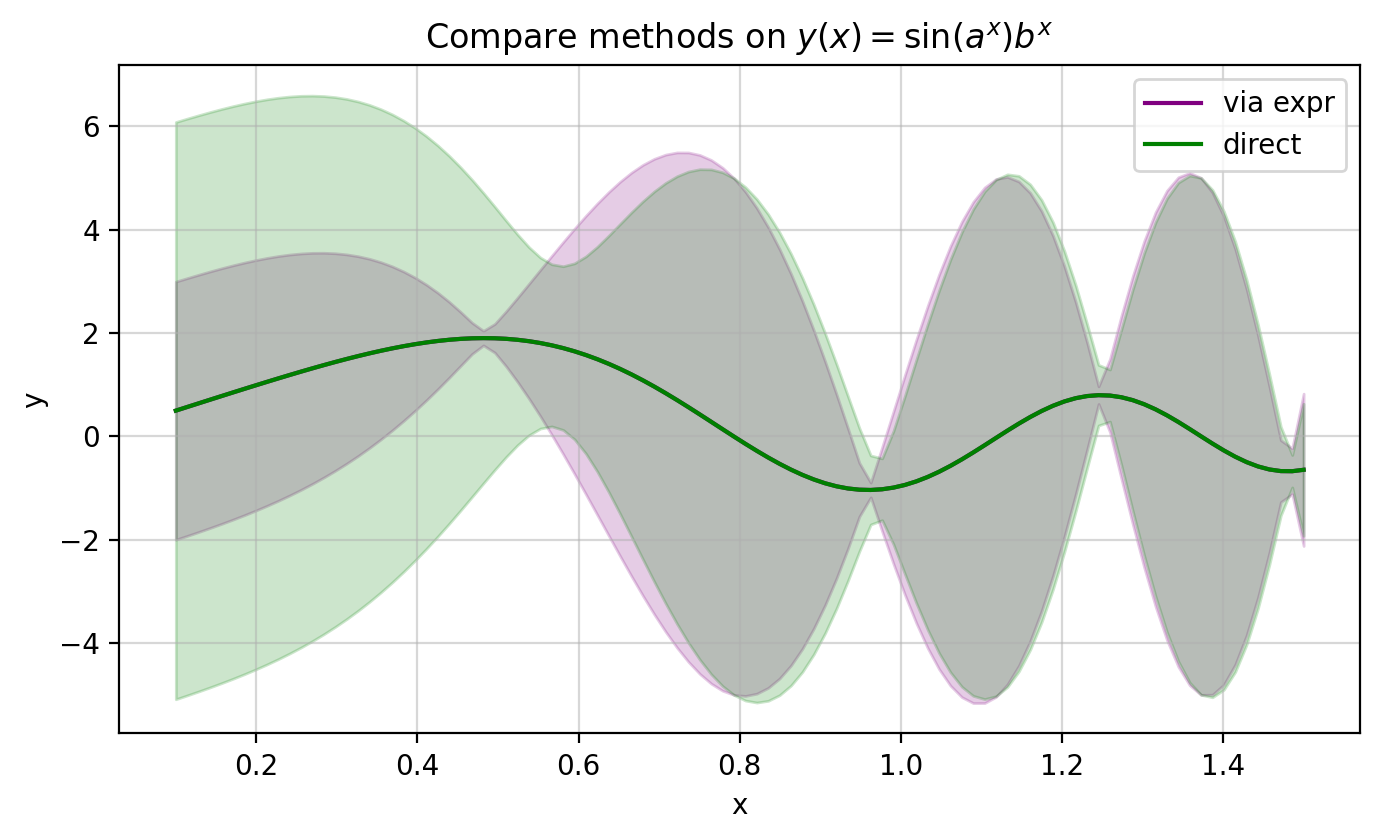

In [16]:
x_data = pt.UErr(np.linspace(0.1,1.5, 100), 0.5)
a_val = pt.UErr(5,0.1)
b_val = pt.UErr(-1,0.1)
a,b,x = sympy.symbols('a,b,c')

# we use calc err here instead of computing directly because x appears multiple times in the expression
y_data1 = pt.u_propagate_error(
    sympy.sin(a*x**2)*x**b,
    {
        a: a_val,
        b:b_val, x:x_data
    })

y_data2 = np.sin(a_val*x_data**2)*x_data**b_val

#start plot automatically adds tytle, x and y labels and the grid, you can also set the fontsize and more
pt.plotting.set_up_plot(r'Compare methods on $y(x) = \sin(a^x)b^x$', 'x', 'y')

pt.plotting.err_band_plot(x_data.mean, y_data1.mean, y_data1.err, label=r'via expr', color = 'purple')
pt.plotting.err_band_plot(x_data.mean, y_data2.mean, y_data2.err, label=r'direct', color = 'green')
plt.legend()
plt.show()